In [202]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
plt.style.use('classic')
np.random.seed(3)

In [203]:
w0=(np.random.random())*0.5-0.25
w1=(np.random.random())*2-1
w2=(np.random.random())*2-1
print("The values of w0, w1 and w2 are {:.5f},{:.5f}, and {:.5f}".format(w0,w1,w2))

The values of w0, w1 and w2 are 0.02540,0.41630, and -0.41819


In [204]:
S=(np.random.random(size=(1000,2)))*2-1
df_s=pd.DataFrame(S,columns=['x1','x2'])
df_s['label']=df_s.apply(lambda x: 1 if w0+w1*x.x1+w2*x.x2>=0 else 0,axis=1) #apply function to each row!
df_s1=df_s[df_s['label']==1]
df_s0=df_s[df_s['label']==0]

In [205]:
len(df_s1),len(df_s0)

(514, 486)

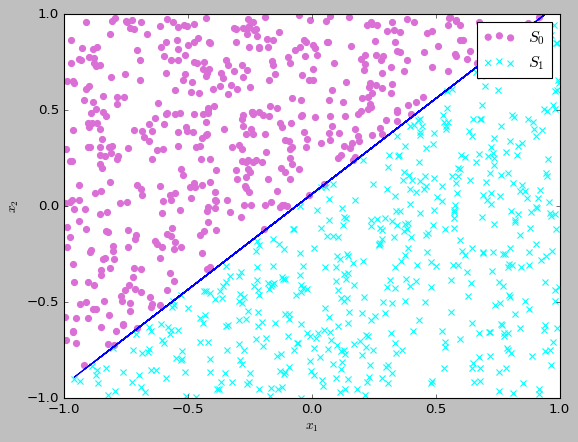

In [206]:
fig,ax=plt.subplots(figsize=(8,6))
ax.scatter(df_s0.x1,df_s0.x2,alpha=1,color='orchid',marker='o',label='$S_{0}$',s=30)
ax.scatter(df_s1.x1,df_s1.x2,alpha=1,color='cyan',marker='x',label='$S_{1}$',s=30)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
x=(np.random.random(100))*2-1
y=-w0/w2-x*w1/w2
ax.plot(x,y)
ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
ax.legend()
plt.show()

## Training Initialization

In [207]:
def classify(w0,w1,w2):
    df_s['predicted_label']=df_s.apply(lambda x: 1 if w0+w1*x.x1+w2*x.x2>=0 else 0,axis=1)
    #apply function to each row!
    return 

In [208]:
def count_missclassified(w0,w1,w2):
    classify(w0,w1,w2)
    return np.sum(np.abs(df_s['predicted_label']-df_s['label']))

In [209]:
def do_one_epoch(w0_init,w1_init,w2_init,eta):
    w0=w0_init
    w1=w1_init
    w2=w2_init
    for i in range(len(df_s)):
            classify(w0,w1,w2)
            w0=w0+eta*1*(df_s.loc[i]['label']-df_s.loc[i]['predicted_label'])
            w1=w1+eta*df_s.loc[i]['x1']*(df_s.loc[i]['label']-df_s.loc[i]['predicted_label'])
            w2=w2+eta*df_s.loc[i]['x2']*(df_s.loc[i]['label']-df_s.loc[i]['predicted_label'])
    return((w0,w1,w2))  

In [210]:
eta=1
w0_=(np.random.random())*2-1
w1_=(np.random.random())*2-1
w2_=(np.random.random())*2-1
num_missclassified=[]
w0_bar=w0_
w1_bar=w1_
w2_bar=w2_
weights={}
num_epochs=50
for i in range(num_epochs):
    w0_bar,w1_bar,w2_bar=do_one_epoch(w0_bar,w1_bar,w2_bar,eta)
    num_missclassified.append(count_missclassified(w0_bar,w1_bar,w2_bar))
    weights[i]=[w0_bar,w1_bar,w2_bar]

In [211]:
num_missclassified

[71,
 66,
 63,
 3,
 60,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [212]:
print("The optimal weights are: {:.5f}, {:.5f}, {:.5f}".format(w0_bar,w1_bar,w2_bar))

The optimal weights are: 0.56461, 9.42600, -9.51270


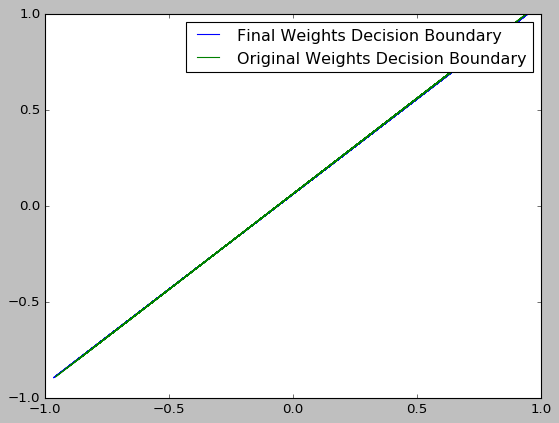

In [213]:
fig2,ax2=plt.subplots(figsize=(8,6))
x2=(np.random.random(100))*2-1
y2=-w0_bar/w2_bar-x2*w1_bar/w2_bar
ax2.plot(x2,y2,label='Final Weights Decision Boundary')
ax2.plot(x,y,label='Original Weights Decision Boundary')
ax2.set_xlim([-1,1])
ax2.set_ylim([-1,1])
ax2.legend()
plt.show()

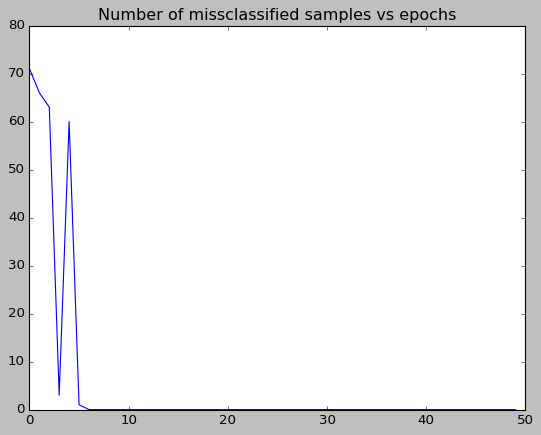

In [214]:
fig3,ax3=plt.subplots(figsize=(8,6))
ax3.plot(range(num_epochs),num_missclassified)
ax3.set_title('Number of missclassified samples vs epochs')
plt.show()